In [1]:
# Basic Libraries
%matplotlib inline 
import time
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from urllib.request import urlopen 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from collections import OrderedDict  
data_path = r"C:\Users\jethr\ICPSR_36404-V2\ICPSR_36404\DS0001\36404-0001-Data.tsv"
sb.set() # set the default Seaborn style for graphics

In [2]:
def build_df(filename):
    df = pd.read_csv(data_path, header=0, sep="\t")
    return df

# Data Preparation/Cleaning

In [3]:
df = build_df(data_path)
print(df.dtypes)

C:\Users\jethr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ABT_INMATE_ID        object
SEX                   int64
ADMTYPE               int64
OFFGENERAL            int64
EDUCATION             int64
ADMITYR               int64
RELEASEYR             int64
MAND_PRISREL_YEAR    object
PROJ_PRISREL_YEAR    object
PARELIG_YEAR         object
SENTLGTH             object
OFFDETAIL             int64
RACE                  int64
AGEADMIT              int64
AGERELEASE           object
TIMESRVD              int64
RELTYPE              object
STATE                 int64
dtype: object


In [4]:
df.replace(" ", np.nan, inplace=True)

In [5]:
df.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
0,A012015000000091071,1,1,2,9,2006,2010,NaN,NaN,NaN,4,10,9,3,3,2,3,1
1,A022015000000096906,1,3,3,9,2008,2008,NaN,NaN,NaN,0,12,1,3,3,0,NaN,2
2,A042015000000118649,1,1,1,9,2013,2014,2014,2014,NaN,0,6,1,1,1,0,1,4
3,A062015000000167469,1,2,2,9,1996,1996,NaN,NaN,NaN,2,7,1,2,2,0,1,6
4,A132015000000550479,1,1,1,9,1968,1972,1978,NaN,NaN,3,4,1,1,1,2,1,13


In [6]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10907333, 18)


ABT_INMATE_ID              0
SEX                        0
ADMTYPE                    0
OFFGENERAL                 0
EDUCATION                  0
ADMITYR                    0
RELEASEYR                  0
MAND_PRISREL_YEAR    7209317
PROJ_PRISREL_YEAR    4662333
PARELIG_YEAR         8148769
SENTLGTH               20063
OFFDETAIL                  0
RACE                       0
AGEADMIT                   0
AGERELEASE           1200886
TIMESRVD                   0
RELTYPE              1809372
STATE                      0
dtype: int64


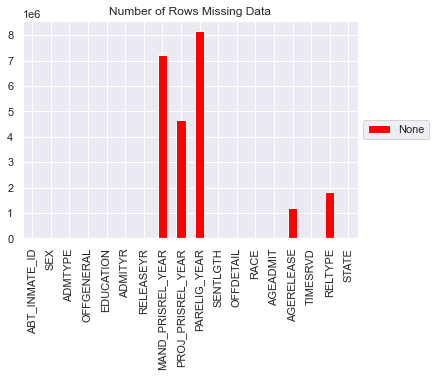

In [7]:
missing_data = df.isnull().sum()
print(missing_data)
missing_data.plot(kind='bar', color='Red', title="Number of Rows Missing Data", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

As we can see from the above graph, most of the missing data are related to the year when the prisoner is going to be released. For example, some columns such as PARELIG_YEAR are missing almost 80% of their values. Therefore, we cannot impute the values in these columns as more data is missing than available. It is best that we drop all missing values. 

In [8]:
complete_rows = df.dropna()

In [9]:
complete_rows.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


Convert relevant data types from object to integer

In [10]:
complete_rows['MAND_PRISREL_YEAR'] = complete_rows['MAND_PRISREL_YEAR'].astype(str).astype(int)
complete_rows['PROJ_PRISREL_YEAR'] = complete_rows['PROJ_PRISREL_YEAR'].astype(str).astype(int)
complete_rows['PARELIG_YEAR'] = complete_rows['PARELIG_YEAR'].astype(str).astype(int)
complete_rows['AGERELEASE'] = complete_rows['AGERELEASE'].astype(str).astype(int)
complete_rows['RELTYPE'] = complete_rows['RELTYPE'].astype(str).astype(int)
complete_rows['SENTLGTH'] = complete_rows['SENTLGTH'].astype(str).astype(int)

<ipython-input-10-cf14f2ca324f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['MAND_PRISREL_YEAR'] = complete_rows['MAND_PRISREL_YEAR'].astype(str).astype(int)
<ipython-input-10-cf14f2ca324f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['PROJ_PRISREL_YEAR'] = complete_rows['PROJ_PRISREL_YEAR'].astype(str).astype(int)
<ipython-input-10-cf14f2ca324f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Convert relevant data types from object to categorical

In [11]:
complete_rows['SEX'] = complete_rows['SEX'].astype("category")
complete_rows['ADMTYPE'] = complete_rows['ADMTYPE'].astype("category")
complete_rows['OFFGENERAL'] = complete_rows['OFFGENERAL'].astype("category")
complete_rows['EDUCATION'] = complete_rows['EDUCATION'].astype("category")
complete_rows['SENTLGTH'] = complete_rows['SENTLGTH'].astype("category")
complete_rows['OFFDETAIL'] = complete_rows['OFFDETAIL'].astype("category")
complete_rows['RACE'] = complete_rows['RACE'].astype("category")
complete_rows['AGEADMIT'] = complete_rows['AGEADMIT'].astype("category")
complete_rows['AGERELEASE'] = complete_rows['AGERELEASE'].astype("category")
complete_rows['TIMESRVD'] = complete_rows['TIMESRVD'].astype("category")
complete_rows['RELTYPE'] = complete_rows['RELTYPE'].astype("category")
complete_rows['STATE'] = complete_rows['STATE'].astype("category")

<ipython-input-11-30e05d9d4249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['SEX'] = complete_rows['SEX'].astype("category")
<ipython-input-11-30e05d9d4249>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['ADMTYPE'] = complete_rows['ADMTYPE'].astype("category")
<ipython-input-11-30e05d9d4249>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [12]:
print(complete_rows.dtypes)

ABT_INMATE_ID          object
SEX                  category
ADMTYPE              category
OFFGENERAL           category
EDUCATION            category
ADMITYR                 int64
RELEASEYR               int64
MAND_PRISREL_YEAR       int32
PROJ_PRISREL_YEAR       int32
PARELIG_YEAR            int32
SENTLGTH             category
OFFDETAIL            category
RACE                 category
AGEADMIT             category
AGERELEASE           category
TIMESRVD             category
RELTYPE              category
STATE                category
dtype: object


In [13]:
print(len(complete_rows))

720189


As can be seen, eventhough we have dropped more than 90% of the data, we are still left with 720K rows which is more than enough to work with. 

In [14]:
complete_rows.head()

,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


Since the data file contains one record for each separate term in prison. An individual person may have more than one record, but all will be assigned the same Abt_Inmate_ID value. Thus, we iterate through the dataset to find deuplicate copies of Abt_Inmate_ID value which indicates that the felony has recommited a crime. We will mark 0 as non-repeated offender and 1 as repeated offender. 

In [15]:
repeat = complete_rows.set_index('ABT_INMATE_ID').index.duplicated(keep=False) #If the index is duplicated, TRUE, else FALSE
repeat = repeat * 1 #Change true and false to 1 and 0.


In [16]:
recividism = [x + 0 for x in repeat] #add 1 to all the numbers in repeat.
se = pd.Series(recividism)
complete_rows.insert(0, 'recidivism', se.values) #insert this row inside
#it will be binary from now on

In [17]:
complete_rows.head()

,recidivism,ABT_INMATE_ID,SEX,ADMTYPE,OFFGENERAL,EDUCATION,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,A182015000000019353,2,3,3,9,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,A442015000000038143,1,1,3,9,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,A042015000000273326,1,1,2,9,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,A042015000000190084,1,1,1,9,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,A042015000000224709,1,2,1,9,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4


We will proceed to drop 'ABT_INMATE_ID' as it will not be used for our machine learning model.

In [18]:
complete_rows.drop('ABT_INMATE_ID', axis=1, inplace = True)
complete_rows['recidivism'] = complete_rows['recidivism'].astype("category")

C:\Users\jethr\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-18-a71639884402>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_rows['recidivism'] = complete_rows['recidivism'].astype("category")


Now I remove all the rows that have "missing"

In [19]:
complete_rows = complete_rows[complete_rows.RELEASEYR != 9999]
complete_rows = complete_rows[complete_rows.ADMTYPE != 9]
complete_rows = complete_rows[complete_rows.OFFGENERAL != 9]
complete_rows = complete_rows[complete_rows.ADMITYR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 99]
complete_rows = complete_rows[complete_rows.RACE != 9]
complete_rows = complete_rows[complete_rows.AGEADMIT != 9]
complete_rows.drop('EDUCATION', axis=1, inplace=True) # missing all values
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9993]
complete_rows = complete_rows[complete_rows.PROJ_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.PARELIG_YEAR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 9]
complete_rows = complete_rows[complete_rows.SENTLGTH != 9]
complete_rows = complete_rows[complete_rows.AGERELEASE != 9]
complete_rows = complete_rows[complete_rows.RELTYPE != 9]

I created complete_rows2 as random forest and Decision Tree do not require standardScaling of continuous variables. 

In [51]:
complete_rows.head()
complete_rows2 = complete_rows.copy()

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,0.281023,0.018399,-0.046774,-0.097914,0.015980,2,12,1,2,2,0,1,18
23,1,1,1,3,0.071847,-0.270770,-0.099855,-0.159550,-0.050625,1,12,2,4,4,1,2,44
287979,0,1,1,2,1.117729,1.175077,0.032847,0.148631,0.149188,3,10,1,5,5,1,1,4
404424,0,1,1,1,1.117729,1.464246,0.059387,0.210267,0.182490,3,1,1,4,4,1,1,4
488157,0,1,2,1,1.117729,1.175077,0.032847,0.148631,0.082584,4,3,1,5,5,0,1,4


Applying StandardScaler for continuous variables (only applicable to neural network dataset)

In [21]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
columns = ['ADMITYR', 'RELEASEYR', 'MAND_PRISREL_YEAR', 'PROJ_PRISREL_YEAR', 'PARELIG_YEAR']
for i in columns:
    # load data
    data = complete_rows[i].values.reshape(-1,1)
    # create scaler
    scaler = StandardScaler()
    # fit and transform in one step
    complete_rows[i] = scaler.fit_transform(data)

In [22]:
complete_rows.head(10)

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,0.281023,0.018399,-0.046774,-0.097914,0.015980,2,12,1,2,2,0,1,18
23,1,1,1,3,0.071847,-0.270770,-0.099855,-0.159550,-0.050625,1,12,2,4,4,1,2,44
287979,0,1,1,2,1.117729,1.175077,0.032847,0.148631,0.149188,3,10,1,5,5,1,1,4
404424,0,1,1,1,1.117729,1.464246,0.059387,0.210267,0.182490,3,1,1,4,4,1,1,4
488157,0,1,2,1,1.117729,1.175077,0.032847,0.148631,0.082584,4,3,1,5,5,0,1,4
491650,0,1,1,1,1.117729,1.464246,0.032847,0.148631,0.149188,3,3,1,3,3,1,1,4
743263,0,1,2,2,-1.392387,-2.294955,0.245169,-0.529367,0.382303,2,7,3,2,2,1,1,6
2086862,0,2,2,1,0.490200,0.018399,-0.073314,-0.406095,-0.117229,2,5,2,4,4,0,2,6
2942323,0,2,2,2,0.699376,0.596738,-0.020234,-0.221186,0.215792,2,11,1,3,3,0,1,6
3075560,0,1,1,1,1.326905,1.464246,0.085927,0.271903,0.182490,2,6,3,2,2,0,1,8


In [23]:
complete_rows2.head(10)

,recidivism,SEX,ADMTYPE,OFFGENERAL,ADMITYR,RELEASEYR,MAND_PRISREL_YEAR,PROJ_PRISREL_YEAR,PARELIG_YEAR,SENTLGTH,OFFDETAIL,RACE,AGEADMIT,AGERELEASE,TIMESRVD,RELTYPE,STATE
6,1,2,3,3,2008,2009,2010,2009,2009,2,12,1,2,2,0,1,18
23,1,1,1,3,2007,2008,2008,2008,2007,1,12,2,4,4,1,2,44
287979,0,1,1,2,2012,2013,2013,2013,2013,3,10,1,5,5,1,1,4
404424,0,1,1,1,2012,2014,2014,2014,2014,3,1,1,4,4,1,1,4
488157,0,1,2,1,2012,2013,2013,2013,2011,4,3,1,5,5,0,1,4
491650,0,1,1,1,2012,2014,2013,2013,2013,3,3,1,3,3,1,1,4
743263,0,1,2,2,2000,2001,2021,2002,2020,2,7,3,2,2,1,1,6
2086862,0,2,2,1,2009,2009,2009,2004,2005,2,5,2,4,4,0,2,6
2942323,0,2,2,2,2010,2011,2011,2007,2015,2,11,1,3,3,0,1,6
3075560,0,1,1,1,2013,2014,2015,2015,2014,2,6,3,2,2,0,1,8


Checking of class imbalance in dataset to see if under/oversampling of dataset is required

In [24]:
#to check for class imbalance in data set
def print_data_perc(data_frame, col):
    """Function used to print class distribution"""
    try:
        # Stores value counts
        col_vals = data_frame[col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # If the number of unique instances in column exceeds 20 print warning
        if len(col_vals['index']) > 20:
            print('Warning: values in column are more than 20 \nPlease try a column with lower value counts!')
        # Else it calculates/prints percentage for each unique value in column
        else:
            # Create a function to output the percentage
            f = lambda x, y: 100 * (x / sum(y))
            for i in range(0, len(col_vals['index'])):
                print('{0} accounts for {1:.2f}% of the {2} column'\
                      .format(col_vals['index'][i],
                              f(col_vals[col].iloc[i],
                                col_vals[col]),
                              col))
    # try-except block goes here if it can't find the column in data frame
    except KeyError as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')

In [52]:
print_data_perc(complete_rows, 'recidivism') 

0 accounts for 54.45% of the recidivism column
1 accounts for 45.55% of the recidivism column


In [26]:
print_data_perc(complete_rows2, 'recidivism') 

0 accounts for 54.45% of the recidivism column
1 accounts for 45.55% of the recidivism column


# Train-test split for Neural Network, Random Forest and Decision Tree

X1,y1 are the datasets for neural network. X2,y2 are datasets for Random Forest and Decision Tree

In [56]:
np.random.seed(7)

In [57]:
X1 = complete_rows.iloc[:, 1:17]
y1 = complete_rows.iloc[:, 0:1]

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [59]:
X2 = complete_rows2.iloc[:, 1:17]
y2 = complete_rows2.iloc[:, 0:1]

In [60]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [61]:
print('Train1', X_train.shape, y_train.shape)
print('Test1', X_test.shape, y_test.shape)
print('Train2', X_train2.shape, y_train2.shape)
print('Test2', X_test2.shape, y_test2.shape)

Train1 (462720, 16) (462720, 1)
Test1 (198309, 16) (198309, 1)
Train2 (462720, 16) (462720, 1)
Test2 (198309, 16) (198309, 1)


# Training Neural Network Model

Sigmoid and tanh should not be used as activation function for the hidden layer. This is because of the vanishing gradient problem, i.e., if your input is on a higher side (where sigmoid goes flat) then the gradient will be near zero. This will cause very slow or no learning during backpropagation as weights will be updated with really small values.

The best function for hidden layers is thus ReLu.

In [62]:
import keras
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer of one-dimensional array with 16 elements for input.(Thus no need to flattenlayer) It would produce 17 outputs in return
model.add(Dense(15, activation='relu', input_shape=(16,)))

#Adding another hidden layer
model.add(Dense(15, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


In [63]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 15)                255       
_________________________________________________________________
dense_7 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 16        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


[array([[ 1.75330341e-01,  4.30327654e-01,  2.69641519e-01,
          4.25615251e-01,  2.12805212e-01,  3.89625430e-01,
          3.83749127e-01, -1.82240218e-01, -1.81704849e-01,
          1.63797975e-01, -2.67169774e-01,  3.60819936e-01,
          3.38549137e-01, -2.73868144e-02,  2.50083387e-01],
        [-4.13046986e-01,  2.70144701e-01, -3.83857071e-01,
          1.31087661e-01, -4.02800351e-01, -2.53780454e-01,
          3.69557798e-01,  1.16501510e-01, -1.50903523e-01,
          1.69975162e-01,  1.52167022e-01,  1.51899576e-01,
          1.25841558e-01, -2.03805104e-01,  3.49832833e-01],
        [ 4.01247263e-01,  2.29769409e-01, -3.35857272e-03,
         -6.00429177e-02, -3.80775422e-01,  2.90501893e-01,
         -3.58591974e-01,  2.62086093e-02,  1.74820065e-01,
         -1.62092477e-01, -3.58854532e-01, -9.21186507e-02,
          1.57248139e-01, -2.27570593e-01,  3.64726603e-01],
        [ 4.04798508e-01, -9.22504067e-02,  2.48901248e-02,
          3.08461607e-01,  2.87582576

We used binary_crossentropy because our target variable y is a binary variable

In [64]:
# An epoch is a single pass through the entire training set, followed by testing of the verification set. 
#The batch size that you specify in the code above defines the number of samples that going to be propagated through the network. 
#Also, by doing this, you optimize the efficiency because you make sure that you don’t load too many input patterns into memory at the same time.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   


Determinig Batch size and Epoch for the neural network model

In [38]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(15, activation='relu', input_shape=(16,)))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.767546 using {'batch_size': 20, 'epochs': 100}
0.755241 (0.005048) with: {'batch_size': 10, 'epochs': 10}
0.763840 (0.005977) with: {'batch_size': 10, 'epochs': 50}
0.766098 (0.002102) with: {'batch_size': 10, 'epochs': 100}
0.748014 (0.006264) with: {'batch_size': 20, 'epochs': 10}
0.757121 (0.009635) with: {'batch_size': 20, 'epochs': 50}
0.767546 (0.001535) with: {'batch_size': 20, 'epochs': 100}
0.734271 (0.017954) with: {'batch_size': 40, 'epochs': 10}
0.762569 (0.000755) with: {'batch_size': 40, 'epochs': 50}
0.761821 (0.006023) with: {'batch_size': 40, 'epochs': 100}
0.741837 (0.001669) with: {'batch_size': 60, 'epochs': 10}
0.765219 (0.003053) with: {'batch_size': 60, 'epochs': 50}
0.765701 (0.000730) with: {'batch_size': 60, 'epochs': 100}
0.737649 (0.006900) with: {'batch_size': 80, 'epochs': 10}
0.763109 (0.004159) with: {'batch_size': 80, 'epochs': 50}
0.764315 (0.002395) with: {'batch_size': 80, 'epochs': 100}
0.734704 (0.009567) with: {'batch_size': 100, 'epochs':

Run: tensorboard --logdir ./Graph on anaconda prompt.

http://localhost:6006

In [65]:
model.fit(X_train, y_train,epochs=100, batch_size=20, verbose=1, callbacks=[keras.callbacks.TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)])

Epoch 1/100
23136/23136 [==============================] - 21s 868us/step - loss: 0.6266 - accuracy: 0.6352
Epoch 2/100
23136/23136 [==============================] - 19s 816us/step - loss: 0.5844 - accuracy: 0.6815
Epoch 3/100
23136/23136 [==============================] - 19s 833us/step - loss: 0.5442 - accuracy: 0.7164
Epoch 4/100
23136/23136 [==============================] - 19s 838us/step - loss: 0.5202 - accuracy: 0.7321
Epoch 5/100
23136/23136 [==============================] - 18s 783us/step - loss: 0.5115 - accuracy: 0.7382
Epoch 6/100
23136/23136 [==============================] - 20s 865us/step - loss: 0.5056 - accuracy: 0.7429
Epoch 7/100
23136/23136 [==============================] - 18s 794us/step - loss: 0.5010 - accuracy: 0.7458
Epoch 8/100
23136/23136 [==============================] - 19s 825us/step - loss: 0.4961 - accuracy: 0.7475
Epoch 9/100
23136/23136 [==============================] - 20s 864us/step - loss: 0.4923 - accuracy: 0.7502
Epoch 10/100
23136/23136 [==

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, filename= "nn1.gv", title="My first neural network")

# NN model test results

In [66]:
y_pred = model.predict(X_test)
y_pred

array([[0.46064037],
       [0.28865907],
       [0.9879695 ],
       ...,
       [0.00207418],
       [0.5242503 ],
       [0.9348106 ]], dtype=float32)

In [67]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

6198/6198 [==============================] - 5s 705us/step - loss: 0.4657 - accuracy: 0.7670
[0.4656701385974884, 0.7669697403907776]


In [68]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score, accuracy_score
rounded = [round(x[0]) for x in y_pred]
# Confusion matrix
confusion_matrix(y_test, rounded)

array([[93136, 14771],
       [31441, 58961]], dtype=int64)

In [69]:
# Accuracy 
print("Accuracy: ", accuracy_score(y_test, rounded))
print("Precision: ", precision_score(y_test, rounded))
print("Recall: ", recall_score(y_test, rounded))
print("F1 score: ", f1_score(y_test, rounded))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test, rounded))

Accuracy:  0.7669697290591955
Precision:  0.7996663592470027
Recall:  0.6522090219242938
F1 score:  0.7184495595062571
Cohen Kappa Score:  0.5231472627768783


# Training Random Forest Classifier Model

In [72]:
#Create a Gaussian Classifier
clf1 = RandomForestClassifier(n_estimators=500, oob_score=True)
clf2 = RandomForestClassifier(n_estimators=500, oob_score=True, max_features = "auto", min_samples_leaf = 2)

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
#max_features by default is auto and min_samples_leaf is 1.
pprint(clf1.get_params())

pprint(clf2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [73]:
clf1.fit(X_train2,y_train2)
clf2.fit(X_train2,y_train2)

<ipython-input-73-090b547ca29f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train2,y_train2)
<ipython-input-73-090b547ca29f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf2.fit(X_train2,y_train2)


RandomForestClassifier(min_samples_leaf=2, n_estimators=500, oob_score=True)

Comparing Between clf1 and clf2

In [74]:
y_pred2=clf1.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision score: ", precision_score(y_test2, y_pred2))
print("Recall score: ", recall_score(y_test2, y_pred2))

Accuracy: 0.7658603492529336
Precision score:  0.7608257207260648
Recall score:  0.7093869604654764


In [75]:
y_pred2=clf2.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision score: ", precision_score(y_test2, y_pred2))
print("Recall score: ", recall_score(y_test2, y_pred2))

Accuracy: 0.7790972673958317
Precision score:  0.7858273319510729
Recall score:  0.7085241476958475


In [80]:
print("CLF1 score: ", clf1.score(X_train2, y_train2))
print("CLF2 score: ", clf2.score(X_train2, y_train2))

CLF1 score:  0.9406206777316736
CLF2 score:  0.8872687586445367


In [81]:
print("CLF1 oobscore: ", clf1.oob_score_)
print("CLF2 oobscore: ", clf2.oob_score_)

CLF1 oobscore:  0.7667725622406639
CLF2 oobscore:  0.7793806189488244


As seen above, random forest model accuracy increased by 0.01 when i increased min_samples_leaf from 1 to 2. Thus, we will be using clf2 for our further analysis.

# Feature Selection for Random Forest Classifier Model

Using 'feature_importances'

In [82]:
feat_labels = ['SEX','ADMTYPE','OFFGENERAL','ADMITYR','RELEASEYR','MAND_PRISREL_YEAR','PROJ_PRISREL_YEAR','PARELIG_YEAR','SENTLGTH','OFFDETAIL','RACE','AGEADMIT','AGERELEASE','TIMESRVD','RELTYPE','STATE']
for feature in zip(feat_labels, clf2.feature_importances_):
    print(feature)

('SEX', 0.011466754571740408)
('ADMTYPE', 0.04886226474072332)
('OFFGENERAL', 0.028840394379042962)
('ADMITYR', 0.0867622636711505)
('RELEASEYR', 0.06913643400336503)
('MAND_PRISREL_YEAR', 0.07374964563261392)
('PROJ_PRISREL_YEAR', 0.06541202920779508)
('PARELIG_YEAR', 0.1484453928038904)
('SENTLGTH', 0.040065177466930335)
('OFFDETAIL', 0.05604473035183856)
('RACE', 0.034781562904497146)
('AGEADMIT', 0.03393877571716159)
('AGERELEASE', 0.035632804529097464)
('TIMESRVD', 0.08723491983309074)
('RELTYPE', 0.01852666729774538)
('STATE', 0.1611001828893171)


Using sklearn SelectfromModel for feature selection

In [83]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf2)

# Train the selector
sfm.fit(X_train2, y_train2.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(min_samples_leaf=2,
                                                 n_estimators=500,
                                                 oob_score=True))

In [84]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

ADMITYR
RELEASEYR
MAND_PRISREL_YEAR
PROJ_PRISREL_YEAR
PARELIG_YEAR
TIMESRVD
STATE


In [85]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train2)
X_important_test = sfm.transform(X_test2)

In [94]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=500, oob_score=True)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train2)

<ipython-input-94-7d24d2ac47a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_important.fit(X_important_train, y_train2)


RandomForestClassifier(n_estimators=500, oob_score=True)

# Random Forest Classifier Model Results (clf2 vs clf_importance)

clf2 results

In [96]:
y_pred2=clf2.predict(X_test2)
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Precision score: ", precision_score(y_test2, y_pred2))
print("Recall score: ", recall_score(y_test2, y_pred2))

Accuracy: 0.7790972673958317
Precision score:  0.7858273319510729
Recall score:  0.7085241476958475


In [97]:
confusion_matrix(y_test2, y_pred2)

array([[90450, 17457],
       [26350, 64052]], dtype=int64)

clf_importance results

In [98]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (8 Features) Model
print("Accuracy:", accuracy_score(y_test2, y_important_pred))
print("Precision score: ", precision_score(y_test2, y_important_pred))
print("Recall score: ", recall_score(y_test2, y_important_pred))

Accuracy: 0.7514585823134603
Precision score:  0.7593943217665615
Recall score:  0.6657153602796398


In [99]:
confusion_matrix(y_test2, y_important_pred)

array([[88839, 19068],
       [30220, 60182]], dtype=int64)

In [100]:
print("clf2 score: ", clf2.score(X_train2, y_train2))
print("clf_important score: ", clf_important.score(X_important_train, y_train2))

clf2 score:  0.8872687586445367
clf_important score:  0.7968577109266943


As can be seen, accuracy for model after feature selection has slightly deproved.

In [101]:
print("clf2 score oobscore: ", clf2.oob_score_)
print("clf_important oobscore: ", clf_important.oob_score_)

clf2 score oobscore:  0.7793806189488244
clf_important oobscore:  0.7528224412171508


In [111]:
# print(clf.score(X_test2,y_test2))

# Using features selected from Random Forrest on NN

Using features selected from random forest model above

In [103]:
X3 = complete_rows[['ADMITYR','RELEASEYR','MAND_PRISREL_YEAR','PROJ_PRISREL_YEAR','PARELIG_YEAR','OFFDETAIL','TIMESRVD','STATE']]
y3 = complete_rows.iloc[:, 0:1]
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

In [104]:
# Initialize the constructor
model2 = Sequential()

# Add an input layer of one-dimensional array with 8 elements for input. (Thus no need to flattenlayer) It would produce 32 outputs in return
model2.add(Dense(7, activation='relu', input_shape=(8,)))

# # model.add(Flatten)

# # Add one hidden layer 
model2.add(Dense(7, activation='relu'))

# model2.add(Dense(128, activation='relu'))

# model2.add(Dense(256, activation='relu'))

# Add an output layer 
model2.add(Dense(1, activation='sigmoid')) 

In [105]:
# Model output shape
model2.output_shape

# Model summary
model2.summary()

# Model config
model2.get_config()

# List all weight tensors 
model2.get_weights()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 7)                 63        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


[array([[-0.59417015, -0.56197065,  0.5135302 ,  0.5004445 , -0.57554424,
          0.14618826,  0.11896282],
        [ 0.36223972, -0.21884194, -0.33412206,  0.03615427, -0.5979334 ,
          0.44025797, -0.08478165],
        [ 0.1000635 ,  0.50888544, -0.42866158,  0.45969218,  0.4693306 ,
         -0.45110804, -0.36519805],
        [ 0.2162885 ,  0.28395814, -0.04310507,  0.00943863,  0.04421228,
          0.5464309 ,  0.4105789 ],
        [-0.57340044, -0.5533947 , -0.5625785 ,  0.5753588 , -0.4622479 ,
         -0.25455424, -0.24743217],
        [ 0.3961913 , -0.48524082, -0.6199085 , -0.48874065, -0.15720206,
         -0.5595815 ,  0.5830721 ],
        [ 0.14959127, -0.28740126,  0.08272672, -0.5242937 , -0.23317868,
          0.14668167, -0.04814547],
        [ 0.3794238 , -0.49679703, -0.01604563, -0.4542657 ,  0.13077295,
          0.04789847, -0.20233372]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.23330656,  0.13977844,  0.5055355 ,  0

In [106]:
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [107]:
model2.fit(X_train3, y_train3, epochs=100, batch_size=20, verbose=1,callbacks=[keras.callbacks.TensorBoard(log_dir='./Graph', write_graph=True, write_images=True)])

Epoch 1/100
23136/23136 [==============================] - 89s 3ms/step - loss: 0.8616 - accuracy: 0.5970
Epoch 2/100
23136/23136 [==============================] - 73s 3ms/step - loss: 0.6219 - accuracy: 0.6390
Epoch 3/100
23136/23136 [==============================] - 71s 3ms/step - loss: 0.6170 - accuracy: 0.6466
Epoch 4/100
23136/23136 [==============================] - 74s 3ms/step - loss: 0.6070 - accuracy: 0.6568
Epoch 5/100
23136/23136 [==============================] - 73s 3ms/step - loss: 0.5982 - accuracy: 0.6626
Epoch 6/100
23136/23136 [==============================] - 72s 3ms/step - loss: 0.5863 - accuracy: 0.6711
Epoch 7/100
23136/23136 [==============================] - 28s 1ms/step - loss: 0.5595 - accuracy: 0.6981
Epoch 8/100
23136/23136 [==============================] - 17s 748us/step - loss: 0.5507 - accuracy: 0.7101
Epoch 9/100
23136/23136 [==============================] - 17s 742us/step - loss: 0.5452 - accuracy: 0.7110
Epoch 10/100
23136/23136 [================

23136/23136 [==============================] - 21s 905us/step - loss: 0.5174 - accuracy: 0.7307
Epoch 77/100
23136/23136 [==============================] - 17s 728us/step - loss: 0.5170 - accuracy: 0.7293
Epoch 78/100
23136/23136 [==============================] - 17s 735us/step - loss: 0.5180 - accuracy: 0.7293
Epoch 79/100
23136/23136 [==============================] - 17s 745us/step - loss: 0.5169 - accuracy: 0.7283
Epoch 80/100
23136/23136 [==============================] - 17s 731us/step - loss: 0.5159 - accuracy: 0.7302
Epoch 81/100
23136/23136 [==============================] - 17s 724us/step - loss: 0.5174 - accuracy: 0.7296
Epoch 82/100
23136/23136 [==============================] - 17s 725us/step - loss: 0.5171 - accuracy: 0.7308
Epoch 83/100
23136/23136 [==============================] - 17s 728us/step - loss: 0.5185 - accuracy: 0.7284
Epoch 84/100
23136/23136 [==============================] - 17s 725us/step - loss: 0.5176 - accuracy: 0.7282
Epoch 85/100
23136/23136 [======

In [108]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model2, filename= "nn2.gv", title="Neural Network revised")

In [109]:
y_pred3 = model2.predict(X_test3)
y_pred3
rounded2 = [round(x[0]) for x in y_pred3]
# Confusion matrix
confusion_matrix(y_test3, rounded2)

array([[85943, 21964],
       [32735, 57667]], dtype=int64)

In [110]:
# Accuracy 
print("Accuracy: ", accuracy_score(y_test3, rounded2))
print("Precision: ", precision_score(y_test3, rounded2))
print("Recall: ", recall_score(y_test3, rounded2))
print("F1 score: ", f1_score(y_test3, rounded2))
print("Cohen Kappa Score: ", cohen_kappa_score(y_test3, rounded2))

Accuracy:  0.7241728817148995
Precision:  0.7241777699639588
Recall:  0.6378951793101922
F1 score:  0.6783036234142784
Cohen Kappa Score:  0.4385880835729684
